# Hénon map

The Hénon map is a discrete-time dynamical system. It is one of the most studied examples of dynamical systems that exhibit chaotic behavior. The Hénon map takes a point $(x_n, y_n)$ in the plane and maps it to a new point

$$
\begin{cases}x_{n+1} = 1-a x_n^2 + y_n\\y_{n+1} = b x_n.\end{cases}
$$

In [1]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt

In [2]:
class HenonMap(bp.dyn.DynamicalSystem):
  """Hénon map."""

  def __init__(self, num, a=1.4, b=0.3):
    super(HenonMap, self).__init__()

    # parameters
    self.a = a
    self.b = b
    self.num = num

    # variables
    self.x = bm.Variable(bm.zeros(num))
    self.y = bm.Variable(bm.zeros(num))

  def update(self, tdi):
    x_new = 1 - self.a * self.x * self.x + self.y
    self.y.value = self.b * self.x
    self.x.value = x_new

In [3]:
map = HenonMap(4)
map.a = bm.asarray([0.5, 1.0, 1.4, 2.0])

In [4]:
runner = bp.dyn.DSRunner(map, monitors=['x', 'y'], dt=1)
runner.run(10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

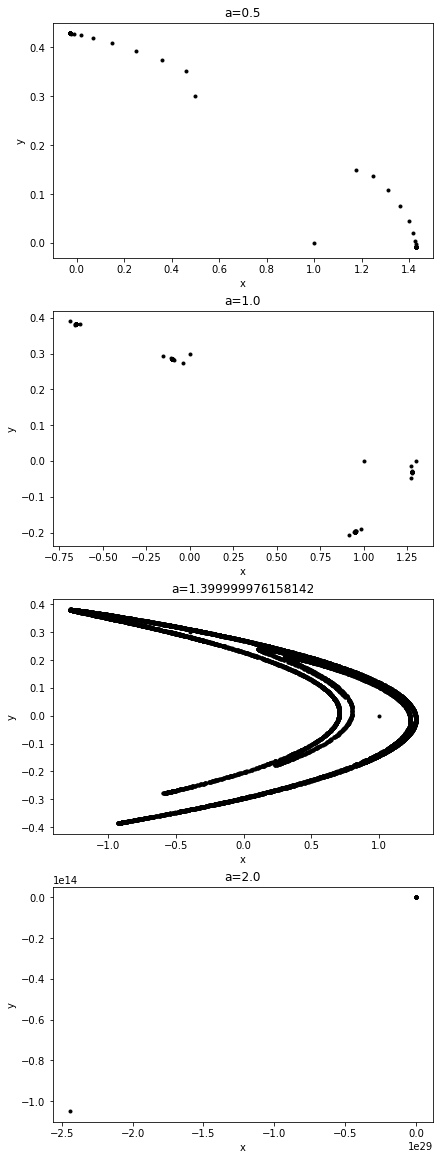

In [5]:
fig, gs = bp.visualize.get_figure(4, 1, 4, 6)
for i in range(map.num):
  fig.add_subplot(gs[i, 0])
  plt.plot(runner.mon.x[:, i], runner.mon.y[:, i], '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'a={map.a[i]}')
  if (i + 1) == map.num:
    plt.show()

The strange attractor illustrated above is obtained for $a=1.4$ and $b=0.3$.

  0%|          | 0/10000 [00:00<?, ?it/s]

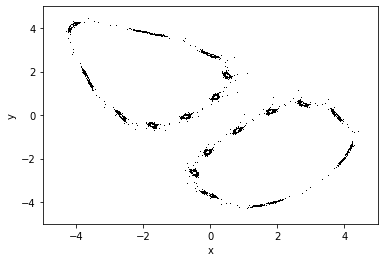

In [6]:
map = HenonMap(1)
map.a = 0.2
map.b = 0.9991

runner = bp.dyn.DSRunner(map, monitors=['x', 'y'], dt=1)
runner.run(10000)
plt.plot(runner.mon.x[:, 0], runner.mon.y[:, 0], ',k')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

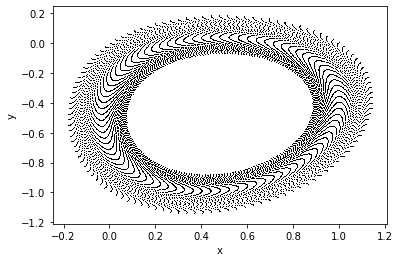

In [7]:
map = HenonMap(1)
map.a = 0.2
map.b = -0.9999

runner = bp.dyn.DSRunner(map, monitors=['x', 'y'], dt=1)
runner.run(10000)
plt.plot(runner.mon.x[:, 0], runner.mon.y[:, 0], ',k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()